### 시각화의 목표가 제시되어있다

농업을 할 경우에 어떤 작물을 해야 소득이 많이 생기고 많은 이윤을 남기는지 알기위함

### 시각화의 범위가 설정되어 있다.

소득과 소득률 상위 품목들을 그래프화 시켰음

### 시각화의 개발절차가 명시되어있다.

통계청 kosis.kr에서 농작물 소득총괄표를 이용하여 시각화 시켰음

### 시각화 자료를 활용한 사용자 수준의 및 취향, 목적이 제시되어 있다.

소득 상위 5개 품목과 소득률 상위 5개 품목을 그래프화 시켰음

### 시각화 자료의 제시 시나리오 또는 스토리보드가 제시 되어있다.

요즘 시대 귀농하여 작물을 키우면서 소소하게 살고 싶어하는 사람들이 많이때문에

그래도 조금더 소득을 많게 하기위해서는 어떤 작물을 선택하는 것이 좋은가 알아봄

### 시각화 표현의 형태 및 규칙이 글로서 명시되어있다.

다른 작물들과 비교하여 보기 쉽게 하기 위해서 bar그래프를 선택 하였고 소득률 그래프와 소득 그래프를 따로 나눠서 만들었음

### 시각화 UI가 글로서 명시되어 있다.

x축에는 작물들의 이름을 넣고 y축에는 소득과 소득률을 각각 넣었다.

### 시각화 내용 정리를 위한 적절한 분석 작업이 이루어졌다.

자료가 너무 많았기 때문에 소득과 소득률이 높은 5가지를 오름차순으로
한뒤 상위 5품목을 제외하고 없앤뒤 그래프를 만들었음

### 시각화 목적에 부합하는 시각화 표현이 적절히 이루어졌다.

겹쳐보이는 그래프를 조금더 보기 쉽게 만들고 제목을 각각 붙였음

In [21]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
f_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

pd_data = pd.read_csv('소득총괄표_20230313170304.csv',encoding='cp949',header=0)
#pd_data = pd_data.drop(pd_data['품목군별(1)'])
#print(pd_data)
filter1 = pd_data['품목군별(2)']== '소계'
pd_data.loc[filter1,'품목군별(2)']=np.NaN
pd_data = pd_data.dropna()
pd_data=pd_data.drop(pd_data.columns[1],axis=1)
pd_data.columns=['년도','품목명','소득','소득률']
pd_data.head()


,년도,품목명,소득,소득률
1,2021,겉보리,118525,30.3
2,2021,쌀보리,201414,39.6
3,2021,밀,229152,45.8
4,2021,노지풋옥수수,1029639,54.7
5,2021,고구마,2005282,52.3


In [27]:
pd_data['소득 순위'] = pd_data['소득'].rank(method='min', ascending=False)
pd_data['소득률 순위'] = pd_data['소득률'].rank(method='min', ascending=False)
pd_data.head()
#sns.relplot(data=pd_data,x='품목명',y='소득')
income_rank = pd_data.sort_values('소득 순위')
income_rank = income_rank.reset_index()
#income_top5 = income_top5.drop((income_top5['소득 순위']>5).index)
income_top5 = income_rank.loc[:4,:]
print(income_top5)
incomerate_rank= pd_data.sort_values('소득률 순위')
incomerate_rank = incomerate_rank.reset_index()
incomerate_top5 = incomerate_rank.loc[:4,:]
print(incomerate_top5)



   index    년도      품목명        소득   소득률  소득 순위  소득률 순위
0     25  2021   오이(촉성)  12607184  42.7    1.0    37.0
1     24  2021   딸기(촉성)  11920023  45.0    2.0    32.0
2     49  2021     시설포도  11520676  63.1    3.0     3.0
3     32  2021     시설가지  11287423  45.5    4.0    30.0
4     29  2021  토마토(촉성)  11244269  44.7    5.0    33.0
   index    년도    품목명        소득   소득률  소득 순위  소득률 순위
0     42  2021   노지포도   7324899  69.9   12.0     1.0
1     16  2021  노지시금치   2219173  65.9   28.0     2.0
2     49  2021   시설포도  11520676  63.1    3.0     3.0
3     56  2021     들깨    673854  62.7   47.0     4.0
4     43  2021   노지감귤   2550807  62.7   27.0     4.0


Text(0.5, 1.0, '소득률 상위5품목')

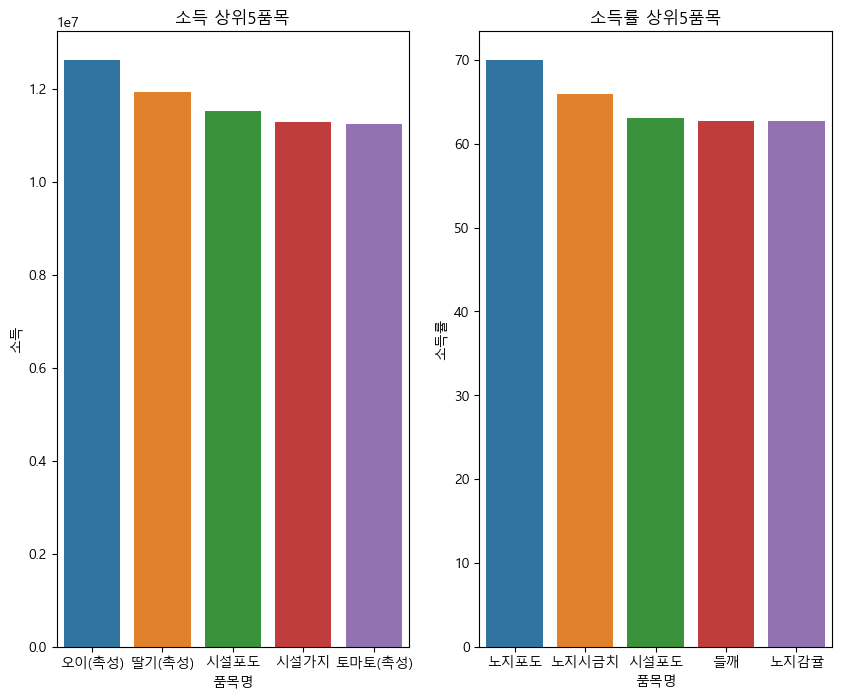

In [66]:
fig,ax = plt.subplots(ncols=2,figsize=(10,8))
sns.barplot(data=income_top5,x='품목명',y='소득',ax=ax[0])
sns.barplot(data=incomerate_top5,x='품목명',y='소득률',ax=ax[1])
ax[0].set_title('소득 상위5품목')
ax[1].set_title('소득률 상위5품목')